In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
df_csv = pd.read_csv('/content/sample_data/(Final)yayaya4.csv')
df_csv

,1. 동별 2030대 인구수,2. 동별 유동인구,3. 대구로카페 주문고객
0,2255,74000.00,14
1,2015,47000.00,12
2,4271,80000.00,43
3,2239,61785.00,4
4,9617,160352.00,52
...,...,...,...
75,7108,140957.81,11
76,7792,182033.00,59
77,1417,75612.12,3
78,0,68423.30,0


In [24]:
df_csv.dtypes
#df_csv.astype('float')
#df_csv.dtypes


1. 동별 2030대 인구수      int64
2. 동별 유동인구         float64
3. 대구로카페 주문고객        int64
dtype: object

In [25]:
print(type(df_csv))

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=100)
kmeans.fit(df_csv)

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=100)

In [26]:
print(kmeans.labels_)


[3 0 3 0 2 0 1 1 2 0 3 0 3 3 2 0 2 2 3 2 2 2 0 0 2 1 0 2 2 1 3 0 0 0 2 2 3
 0 3 3 2 0 1 1 0 0 0 3 0 3 0 3 3 0 0 3 2 3 2 0 3 2 2 3 2 3 0 1 3 2 0 2 2 1
 3 2 2 3 0 3]


In [27]:
df_csv.describe()

,1. 동별 2030대 인구수,2. 동별 유동인구,3. 대구로카페 주문고객
count,80.000000,80.000000,80.000000
mean,7593.687500,122104.100250,34.987500
std,5607.950908,78322.444231,32.036172
min,0.000000,6300.000000,0.000000
25%,3500.250000,64102.572500,11.750000
50%,6501.500000,104209.980000,28.000000
75%,10193.750000,157922.750000,48.250000
max,29579.000000,412536.000000,168.000000


In [28]:
df_csv.isnull().sum()

1. 동별 2030대 인구수    0
2. 동별 유동인구         0
3. 대구로카페 주문고객      0
dtype: int64

In [29]:
# kmeans -> 거리기반 알고리즘 -> 표준화 진행

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
mall_scaled_df = pd.DataFrame(standard_scaler.fit_transform(df_csv), columns=df_csv.columns) # scaled된 데이터

In [30]:
from sklearn.cluster import KMeans

In [31]:
# k에 따라 군집 내 거리제곱합의 합이 어떻게 변하는 지 시각화하는 함수
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(df_csv)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')


In [32]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

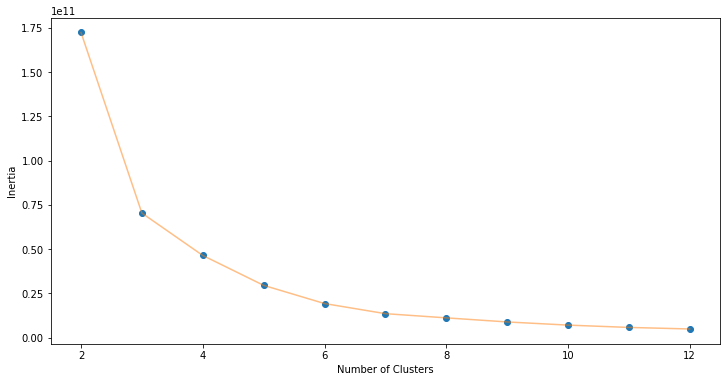

In [33]:
#엘보우결과 3정도가 적당한 클러스터 수임을 알 수 있다.
change_n_clusters(n_clusters, df_csv)

In [34]:
#MinMaxScaler 적용 (표준화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_csv)
df_scaled = scaler.transform(df_csv)

In [35]:
df_scaled

array([[0.07623652, 0.1666519 , 0.08333333],
       [0.06812265, 0.10018807, 0.07142857],
       [0.14439298, 0.18142164, 0.25595238],
       [0.07569559, 0.13658317, 0.02380952],
       [0.32512931, 0.37921799, 0.30952381],
       [0.12329693, 0.1594098 , 0.07738095],
       [0.42083911, 0.67055603, 0.13690476],
       [0.34057947, 0.62998848, 0.31547619],
       [0.19331282, 0.34366477, 0.23214286],
       [0.02728287, 0.05834047, 0.        ],
       [0.21004767, 0.27496332, 0.06547619],
       [0.10321512, 0.14308678, 0.14880952],
       [0.12295886, 0.198653  , 0.07142857],
       [0.1331688 , 0.24697713, 0.02380952],
       [0.11176848, 0.35235676, 0.03571429],
       [1.        , 0.13465079, 0.20238095],
       [0.26498529, 0.47257752, 0.19642857],
       [0.18357619, 0.3537845 , 0.0297619 ],
       [0.22478786, 0.29157928, 0.22619048],
       [0.28949593, 0.46615514, 0.23809524],
       [0.37222354, 0.41055199, 0.21428571],
       [0.15730755, 0.49404779, 0.11904762],
       [0.

In [36]:
# nd.array형인 df_scaled를 dataframe으로 수정하는 코드
df_scaled = pd.DataFrame(df_scaled, columns = ['2030대 인구', '유동인구','대구로카페주문고객'])

In [37]:
df_scaled

,2030대 인구,유동인구,대구로카페주문고객
0,0.076237,0.166652,0.083333
1,0.068123,0.100188,0.071429
2,0.144393,0.181422,0.255952
3,0.075696,0.136583,0.023810
4,0.325129,0.379218,0.309524
...,...,...,...
75,0.240306,0.331477,0.065476
76,0.263430,0.432588,0.351190
77,0.047906,0.170620,0.017857
78,0.000000,0.152924,0.000000


In [38]:
df_scaled['총점'] = df_scaled['2030대 인구'] + df_scaled['유동인구']+ df_scaled['대구로카페주문고객']
df_scaled


,2030대 인구,유동인구,대구로카페주문고객,총점
0,0.076237,0.166652,0.083333,0.326222
1,0.068123,0.100188,0.071429,0.239739
2,0.144393,0.181422,0.255952,0.581767
3,0.075696,0.136583,0.023810,0.236088
4,0.325129,0.379218,0.309524,1.013871
...,...,...,...,...
75,0.240306,0.331477,0.065476,0.637259
76,0.263430,0.432588,0.351190,1.047209
77,0.047906,0.170620,0.017857,0.236383
78,0.000000,0.152924,0.000000,0.152924


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,2030대 인구,유동인구,대구로카페주문고객,총점,cluster
0,0.076237,0.166652,0.083333,0.326222,1
1,0.068123,0.100188,0.071429,0.239739,1
2,0.144393,0.181422,0.255952,0.581767,1
3,0.075696,0.136583,0.023810,0.236088,1
4,0.325129,0.379218,0.309524,1.013871,0
...,...,...,...,...,...
75,0.240306,0.331477,0.065476,0.637259,1
76,0.263430,0.432588,0.351190,1.047209,0
77,0.047906,0.170620,0.017857,0.236383,1
78,0.000000,0.152924,0.000000,0.152924,1


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  func(*args, **kwa

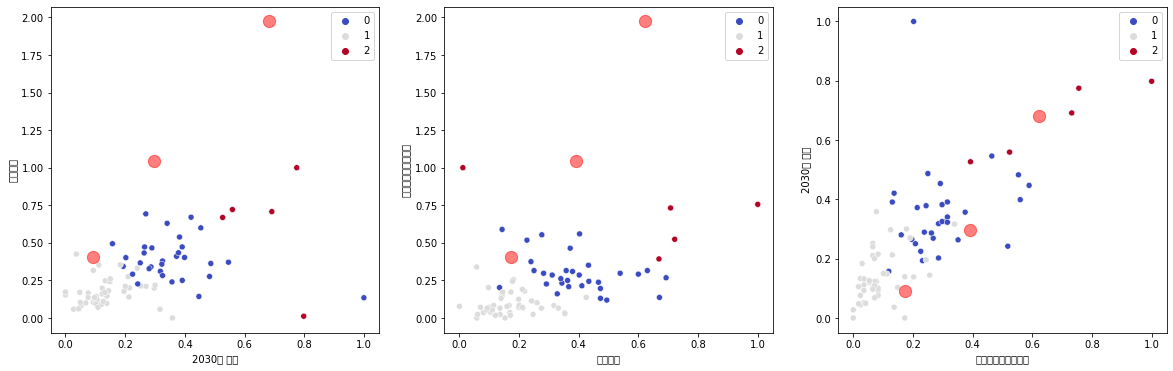

In [39]:
# scaling한 데이터를 kmeans(k=3)으로 학습하고 시각화

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(df_scaled)

plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x='2030대 인구', y='유동인구', data=df_scaled, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(132)
sns.scatterplot(x='유동인구', y='대구로카페주문고객', data=df_scaled, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)

plt.subplot(133)
sns.scatterplot(x='대구로카페주문고객', y='2030대 인구', data=df_scaled, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

df_scaled['cluster'] = clusters.labels_
df_scaled.head()

df_scaled


In [40]:
df_scaled

#내보내기
df_scaled.to_csv('/content/sample_data/beforecluster.csv')